<a href="https://colab.research.google.com/github/nishi1612/Machine-Learning-For-Data-Mining/blob/master/ML4DM_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
id = "18Ml33QE8vQiOPhUCbqxGRpeSlzcOt7FA"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('auto-mpg.csv')  
df = pd.read_csv('auto-mpg.csv')
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
df.index

RangeIndex(start=0, stop=398, step=1)

In [0]:
df = df.drop(columns = df.columns[len(df.columns)-1])

In [8]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [0]:
df = df.dropna(axis=0)

In [10]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [11]:
for cols in df.columns:
  df = df[~df[cols].isin(['?'])]
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [12]:
for col in df.columns:
  vals = df[col].values
  print(type(vals[0]))

<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [13]:
df[df.columns[len(df.columns)-1]].unique()

array([1, 3, 2])

In [14]:
one_hot = pd.get_dummies(df[df.columns[len(df.columns)-1]])
df = df.drop(df.columns[len(df.columns)-1],axis = 1)
df = df.join(one_hot)
df.head(5)  

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,1,2,3
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [15]:
for col in df.columns:
  vals = df[col].values
  print(type(vals[0]))
x = df[df.columns[3]]
x = np.asfarray(x,float)
df[df.columns[3]] = x

<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>


In [0]:
df2 = df.drop(columns=[df.columns[0],df.columns[len(df.columns)-1],df.columns[len(df.columns)-2],df.columns[len(df.columns)-3]])
normalized_df = (df2-df2.mean())/df2.std()

In [17]:
for cols in normalized_df.columns:
  df[cols] = normalized_df[cols]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,1,2,3
0,18.0,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,1,0,0
1,15.0,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,1,0,0
2,18.0,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,1,0,0
3,16.0,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,1,0,0
4,17.0,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,1,0,0
5,15.0,1.482053,2.241772,2.429924,1.605147,-2.008554,-1.623241,1,0,0
6,14.0,1.482053,2.480677,3.001484,1.620452,-2.371022,-1.623241,1,0,0
7,14.0,1.482053,2.346890,2.871584,1.571005,-2.552256,-1.623241,1,0,0
8,14.0,1.482053,2.490234,3.131384,1.704040,-2.008554,-1.623241,1,0,0
9,15.0,1.482053,1.869080,2.222085,1.027093,-2.552256,-1.623241,1,0,0


In [0]:
msk = np.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]

In [19]:
train_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,1,2,3
0,18.0,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,1,0,0
1,15.0,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,1,0,0
2,18.0,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,1,0,0
3,16.0,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,1,0,0
4,17.0,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,1,0,0
5,15.0,1.482053,2.241772,2.429924,1.605147,-2.008554,-1.623241,1,0,0
6,14.0,1.482053,2.480677,3.001484,1.620452,-2.371022,-1.623241,1,0,0
7,14.0,1.482053,2.346890,2.871584,1.571005,-2.552256,-1.623241,1,0,0
8,14.0,1.482053,2.490234,3.131384,1.704040,-2.008554,-1.623241,1,0,0
10,15.0,1.482053,1.802186,1.702485,0.689209,-2.008554,-1.623241,1,0,0


In [20]:
test_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,1,2,3
9,15.0,1.482053,1.869080,2.222085,1.027093,-2.552256,-1.623241,1,0,0
19,26.0,-0.862911,-0.930889,-1.519034,-1.345162,1.797361,-1.623241,0,1,0
28,9.0,1.482053,1.047246,2.300025,2.065470,1.072424,-1.623241,1,0,0
29,27.0,-0.862911,-0.930889,-0.427875,-0.997859,-0.377448,-1.351777,0,0,1
39,14.0,1.482053,1.964642,1.832385,1.749954,-1.464852,-1.351777,1,0,0
42,12.0,1.482053,1.802186,1.962285,2.328008,-1.464852,-1.351777,1,0,0
47,19.0,0.309571,0.531211,-0.116115,0.358388,-0.196214,-1.351777,1,0,0
52,30.0,-0.862911,-1.016895,-0.739634,-1.074384,-0.377448,-1.351777,0,1,0
58,25.0,-0.862911,-0.926111,-0.635714,-1.002568,0.528722,-1.080314,1,0,0
61,21.0,-0.862911,-0.691984,-0.479835,-0.884839,0.347488,-1.080314,1,0,0


In [0]:
trainX = train_df.drop(columns = [df.columns[0]])
testX = test_df.drop(columns = [df.columns[0]])

In [0]:
trainY = train_df.iloc[:,0]
testY = test_df.iloc[:,0]

In [0]:
from sklearn import linear_model
reg = linear_model.LinearRegression().fit(trainX, trainY)

In [24]:
reg.score(trainX, trainY)

0.8179584603381965

In [0]:
testY_pred = reg.predict(testX)

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testY, testY_pred)

10.855720325691431

In [27]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
epochs = 1000
train_validation_split = 0.2
verbose = 1
input_dims = len(trainX.columns)

In [29]:
input_dims

9

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(20,input_dim = input_dims))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('tanh'))
model.add(Dense(10))
model.add(Activation('tanh'))
model.add(Dense(5))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('relu'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                200       
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                

In [32]:
model.compile(optimizer='sgd',loss='mean_squared_error',metrics=['accuracy'])
history = model.fit(trainX,trainY,validation_split=train_validation_split,epochs=epochs,verbose=verbose,shuffle=True)




Train on 248 samples, validate on 62 samples
Epoch 1/1000
248/248 [==============================] - 1s 3ms/step - loss: 321.6951 - acc: 0.0000e+00 - val_loss: 397.5189 - val_acc: 0.0000e+00
Epoch 2/1000
248/248 [==============================] - 0s 55us/step - loss: 83.5675 - acc: 0.0484 - val_loss: 210.5179 - val_acc: 0.0000e+00
Epoch 3/1000
248/248 [==============================] - 0s 68us/step - loss: 49.3548 - acc: 0.0565 - val_loss: 161.2073 - val_acc: 0.0000e+00
Epoch 4/1000
248/248 [==============================] - 0s 69us/step - loss: 45.1995 - acc: 0.0242 - val_loss: 147.0171 - val_acc: 0.0000e+00
Epoch 5/1000
248/248 [==============================] - 0s 54us/step - loss: 44.4253 - acc: 0.0323 - val_loss: 135.8560 - val_acc: 0.0000e+00
Epoch 6/1000
248/248 [==============================] - 0s 54us/step - loss: 41.9583 - acc: 0.0202 - val_loss: 131.9582 - val_acc: 0.0000e+00
Epoch 7/1000
248/248 [==============================] - 0s 54us/step - loss: 25.6915 - acc: 0.06

In [33]:
model.evaluate(testX, testY)

82/82 [==============================] - 0s 56us/step


[11.038924984815644, 0.10975609756097561]

In [0]:
def show_graph(history):
  plt.plot(history.history['loss'])
  plt.title('Loss')
  plt.xlabel('No. of epochs')
  plt.ylabel('Loss')
  plt.show()
  plt.plot(history.history['acc'])
  plt.title('Accuracy')
  plt.xlabel('No. of epochs')
  plt.ylabel('Accuracy')
  plt.show()

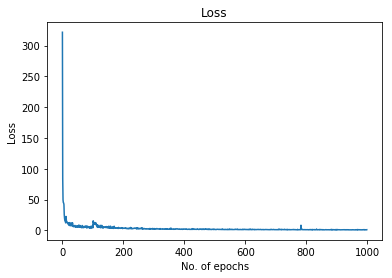

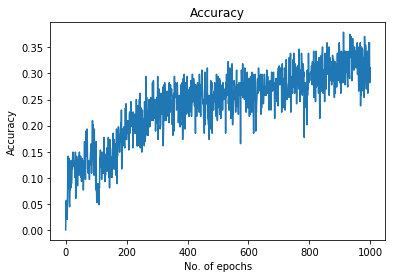

In [35]:
show_graph(history)